   age        income  employment_length       dti  previous_loans  \
0   25  47032.263032                 28  0.099276               3   
1   58  63760.569337                  4  0.185486               1   
2   53  88160.033206                  9  0.322739               5   
3   42  61150.400438                 30  0.076006               6   
4   42  71649.006791                 32  0.617486               2   

   delinquencies  credit_history  default  
0              1               6        0  
1              1               9        0  
2              0              16        0  
3              3              18        0  
4              0               6        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                10000 non-null  int64  
 1   income             10000 non-null  float64
 2   employment_length

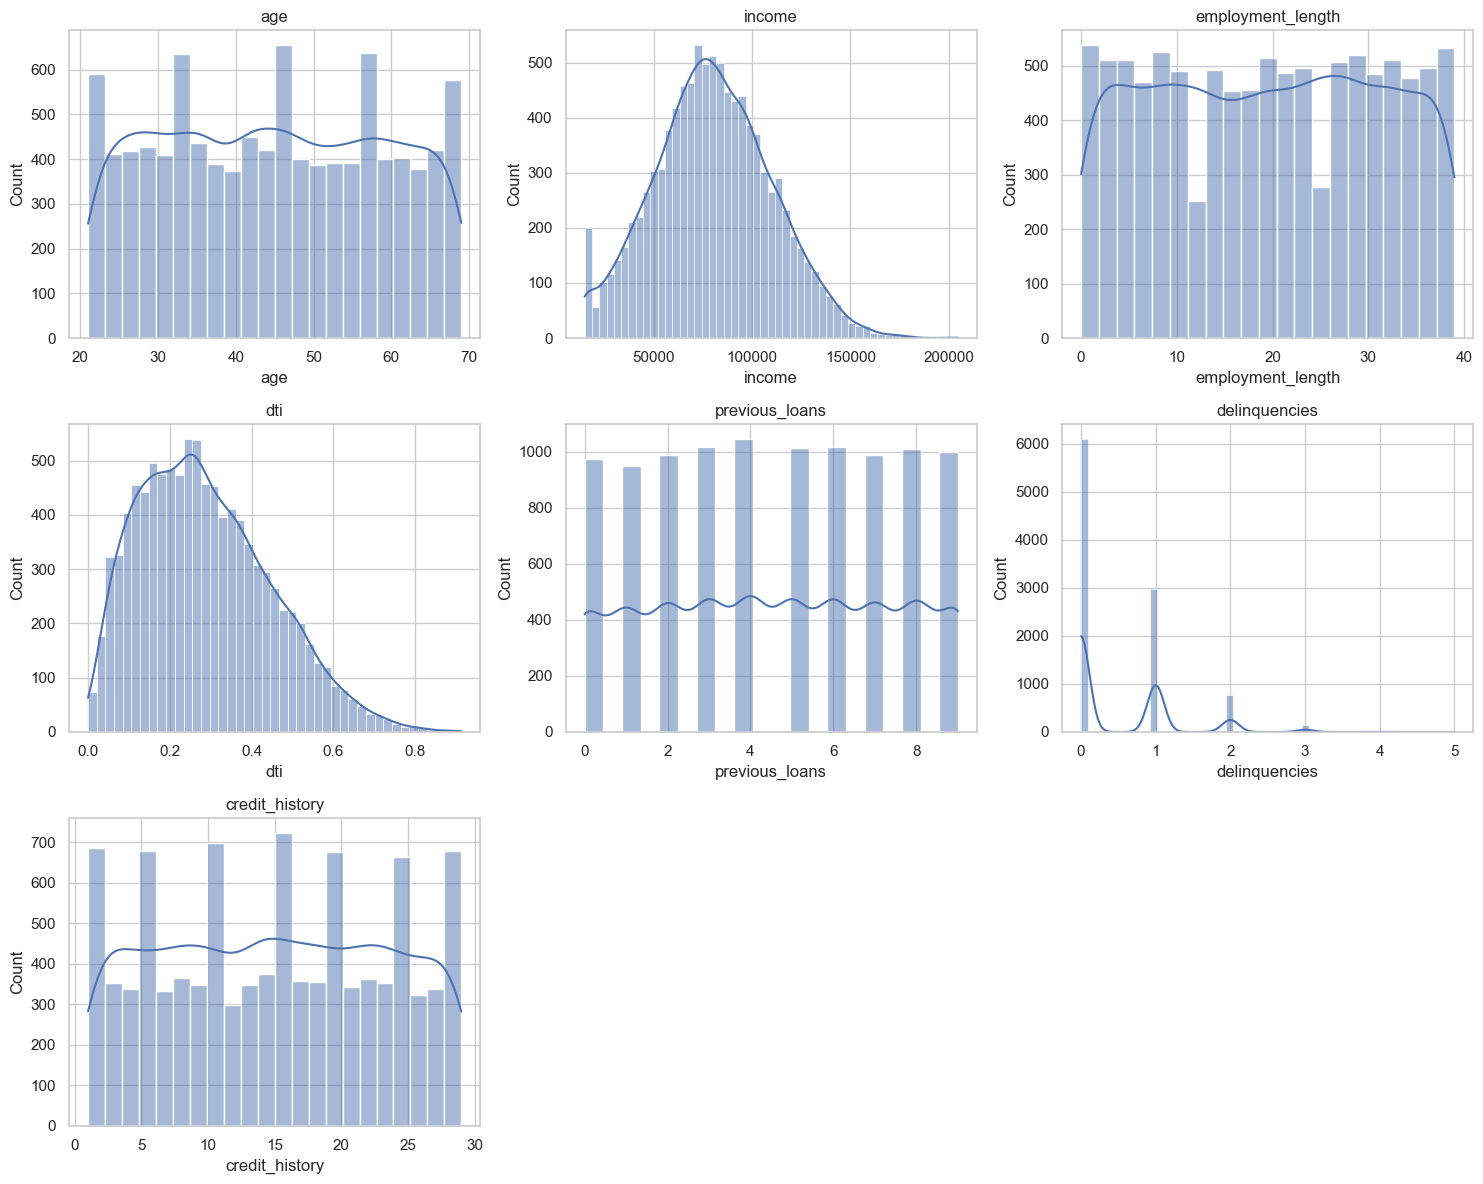

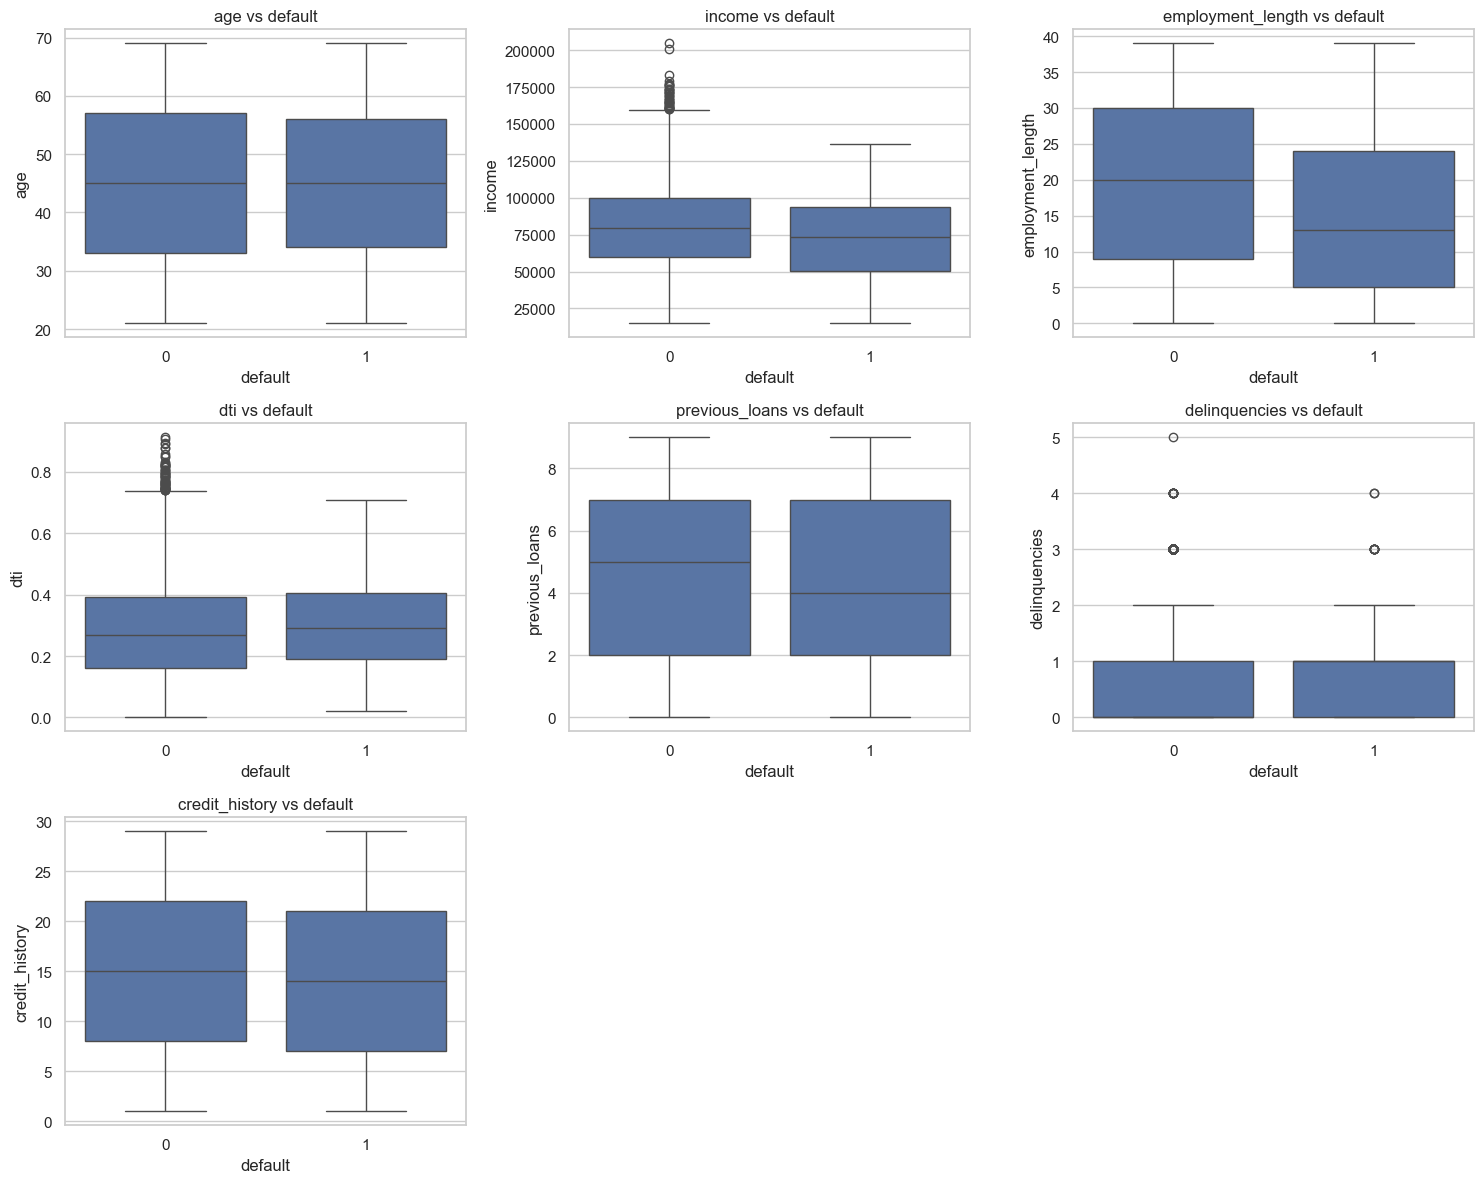

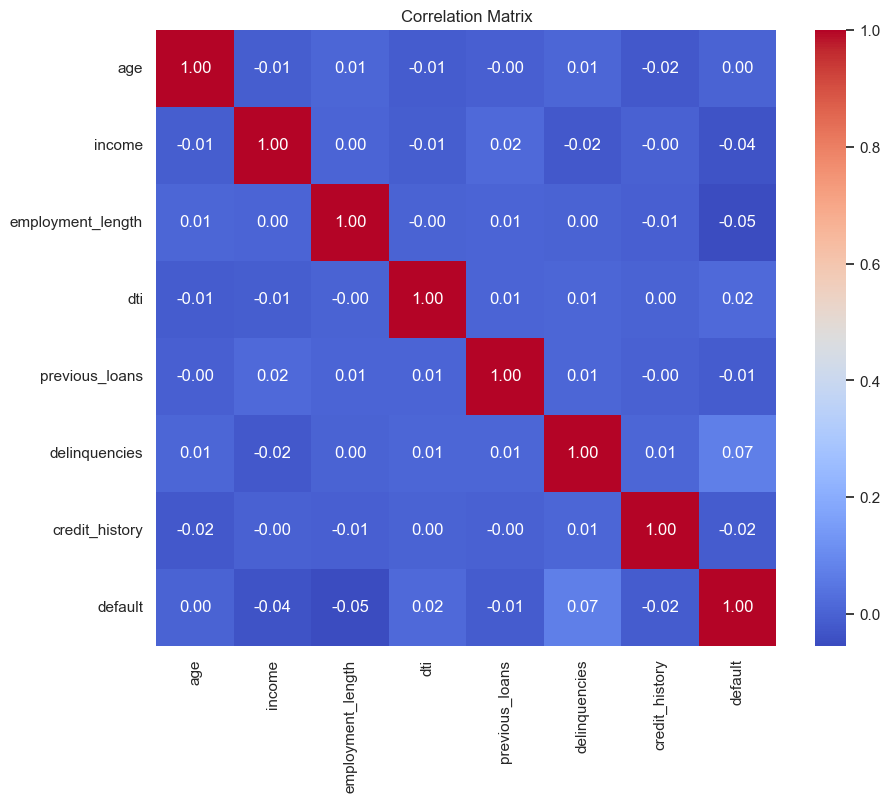

In [2]:
# 01_eda.ipynb
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки отображения
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (6, 4)

# Загрузка данных
df = pd.read_csv("../data/raw/credit_data.csv")

# -----------------------------
# 1. Обзор данных
# -----------------------------
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# -----------------------------
# 2. Распределения числовых признаков
# -----------------------------
numerical_features = ["age", "income", "employment_length", "dti",
                      "previous_loans", "delinquencies", "credit_history"]

n_cols = 3
n_rows = int(np.ceil(len(numerical_features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# -----------------------------
# 3. Числовые признаки vs целевая переменная
# -----------------------------
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(x="default", y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} vs default")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# -----------------------------
# 4. Категориальные признаки (если есть)
# -----------------------------
# В данном случае у нас нет явных категориальных признаков,
# но если они появятся, можно сделать так:
categorical_features = []  # пример: ["gender", "region"]

if categorical_features:
    n_cols = 3
    n_rows = int(np.ceil(len(categorical_features) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_features):
        sns.countplot(x=col, hue="default", data=df, ax=axes[i])
        axes[i].set_title(col)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# -----------------------------
# 5. Матрица корреляций
# -----------------------------
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
